## Аналитика в авиакомпании

### Описание проекта  

Вы аналитик компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.
Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.  

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

• query_1.csv — результат первого запроса. В нём содержится информация о: 

- model — модели самолета 
- flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

• query_3.csv — результат третьего запроса. В нём содержится информация о: 

- city — городах 
- average_flights — среднем количестве рейсов, прибывающих в город city за день в сентябре 2018 года

<a id='back'><a/> 
# Задачи исследования
    
### [1. Изучение данных](#1)

- импортируем данные
- посмотрим на имеющиеся данные в таблицах
- проверить типы данных на корректность
- предварительные выводы

### [2. Топ-10 городов по количеству рейсов](#2)

- выбрать топ-10 городов по количеству рейсов
- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов

### [3. Выводы](#3)

Приступим к изучению данных.

### Предварительная часть. Парсинг данных

In [1]:
import pandas as pd
import numpy as np
import requests
import json
from bs4 import BeautifulSoup 

URL='https://code.s3.yandex.net/learning-materials/data-analyst/festival_news/index.html'
req = requests.get(URL) 
soup = BeautifulSoup(req.text, 'lxml')

table = soup.find('table', attrs={"id": "best_festivals"})

cols_names = []
for heading in table.find_all('th'):
    cols_names.append(heading.text)

festivals_data = []    
for row in table.find_all('tr'):
    if not row.find_all('th'):
        festivals_data.append([element.text for element in row.find_all('td')])

festivals = pd.DataFrame(festivals_data, columns=cols_names)
festivals

,Название фестиваля,Место проведения,Дата проведения
0,Музыкальный фестиваль «Усадьба Jazz»,Екатеринбург,01.07.2018
1,Фестиваль музыки и технологий Alfa Future People,Нижний Новгород,10.08.2018
2,"Фестиваль еды «О, да! Еда!»",Санкт-Петербург,21.07.2018
3,Доброфест,Ярославль,29.07.2018
4,Park Live,Москва,28.07.2018
5,Пикник Афиши,Москва,04.08.2018
6,VK FEST,Санкт-Петербург,29.07.2018
7,"Фестиваль «О, да! Еда!»",Иркутск,25.08.2018
8,"Фестиваль «О, да! Еда!»",Владивосток,02.09.2018
9,Видфест,Москва,08.09.2018


## Предварительная часть. SQL-запросы

### Описание данных  

#### База данных об авиаперевозках:   

<b>Таблица airports</b> — информация об аэропортах:  

- airport_code — трёхбуквенный код аэропорта
- airport_name — название аэропорта
- city — город
- timezone — временная зона  

<b>Таблица aircrafts</b> — информация о самолётах:  

- aircraft_code — код модели самолёта
- model — модель самолёта
- range — количество самолётов
- Таблица tickets — информация о билетах:
- ticket_no — уникальный номер билета
- passenger_id — персональный идентификатор пассажира
- passenger_name — имя и фамилия пассажира  

<b>Таблица flights</b> — информация о рейсах:  

- flight_id — уникальный идентификатор рейса
- departure_airport — аэропорт вылета
- departure_time — дата и время вылета
- arrival_airport — аэропорт прилёта
- arrival_time — дата и время прилёта
- aircraft_code – id самолёта  

<b>Таблица ticket_flights</b> — стыковая таблица «рейсы-билеты»:  

- ticket_no — номер билета
- flight_id — идентификатор рейса  

<b>Таблица festivals</b> — информация о фестивалях:  

- festival_id — уникальный номер фестиваля
- festival_date — дата проведения фестиваля
- festival_city — город проведения фестиваля
- festival_name — название фестиваля

<div>
    
<img src="https://pictures.s3.yandex.net/resources/PK_FK_airports_1566761812.jpg">
    
Схема таблиц
</div>

### Описание подачи решения задач ниже

Часть задания, включающая в себя решения по средствам SQL была выполнена на учебной платформе. Так как у нас нет доступа непосредственно к базам данных и самим таблицам, здесь преведены примеры решения и примеры получившихся таблиц с запросами.

<b>Задача 1</b>

Изучите таблицу flights и подсчитайте количество вылетов (flight_id) из каждого аэропорта вылета (departure_airport). Назовите переменную cnt_flights и выведите её вместе со столбцом departure_airport — сначала departure_airport, потом cnt_flights. Результат отсортируйте в порядке убывания количества вылетов.

In [ ]:
SELECT
    departure_airport,
    COUNT(flights.flight_id) AS cnt_flights
FROM
    flights
GROUP BY
    departure_airport 
ORDER BY
    cnt_flights DESC

In [2]:
pd.read_clipboard()

,DEPARTURE_AIRPORT,CNT_FLIGHTS
0,DME,6376
1,SVO,5912
2,LED,3769
3,VKO,3405
4,OVB,2091
...,...,...
98,IWA,68
99,PKC,52
100,NYA,51
101,PYJ,51


<b>Задача 2</b>  

Найдите количество рейсов на каждой модели самолёта с вылетом в сентябре 2018 года. Назовите получившийся столбец flights_amount и выведите его, также выведите столбец model.Столбцы выводите в таком порядке:model, flights_amount

In [ ]:
SELECT
    model,
    COUNT(aircrafts.aircraft_code) AS flights_amount
FROM
    aircrafts
INNER JOIN flights ON aircrafts.aircraft_code = flights.aircraft_code
WHERE 
    CAST(flights.departure_time AS date) BETWEEN '2018-09-01' AND '2018-09-30'
GROUP BY 
    aircrafts.model

In [3]:
pd.read_clipboard()

,MODEL,FLIGHTS_AMOUNT
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


<b>Задача 3</b>  

Посчитайте количество рейсов по всем моделям самолётов Boeing, Airbus и другим ('other') в сентябре. Типы моделей поместите в столбец type_aircraft, а количество рейсов — во flights_amount. Выведите их на экран.

In [ ]:
SELECT CASE
           WHEN model LIKE 'Boe%' THEN 'Boeing'
           WHEN model LIKE 'Air%' THEN 'Airbus'
           ELSE 'other'
           END AS type_aircraft,
           COUNT(flight_id) AS flights_amount
FROM aircrafts
JOIN flights USING(aircraft_code)
WHERE EXTRACT(MONTH FROM departure_time) = 09
GROUP BY type_aircraft;

In [4]:
pd.read_clipboard()

,TYPE_AIRCRAFT,FLIGHTS_AMOUNT
0,Airbus,1567
1,Boeing,1530
2,other,13188


<b>Задача 4</b>  

Посчитайте среднее количество прибывающих рейсов в день для каждого города за август 2018 года. Назовите получившееся поле average_flights, вместе с ним выведите столбец city.Выводите столбцы в таком порядке: city, average_flights.

In [ ]:
SELECT
    city,
    AVG(filghts_cnt) AS average_flights
FROM
    (SELECT
        city,
        EXTRACT('day' FROM arrival_time) AS DAY,
        COUNT(flight_id) AS filghts_cnt
    FROM
        flights
    INNER JOIN airports ON airports.airport_code = flights.arrival_airport
    WHERE 
        CAST(flights.departure_time  AS date) BETWEEN '2018-08-01' AND '2018-08-31'
    GROUP BY
        city, DAY) AS SUBQ
GROUP BY
    city;

In [5]:
pd.read_clipboard()

,CITY,AVERAGE_FLIGHTS
0,Абакан,3.87097
1,Анадырь,1.05556
2,Анапа,2.16129
3,Архангельск,5.35484
4,Астрахань,2.45161
...,...,...
95,Череповец,2.16129
96,Чита,1.58065
97,Элиста,4.87097
98,Южно-Сахалинск,4.29032


<b>Задача 5</b>  

Установите фестивали, которые проходили с 23 июля по 30 сентября 2018 года в Москве, и номер недели, в которую они проходили. Выведите название фестиваля festival_name и номер недели festival_week.

In [ ]:
SELECT festival_name, EXTRACT(WEEK FROM festival_date) AS festival_week
FROM festivals
WHERE 
    CAST(festival_date  AS DATE) BETWEEN '2018-07-23' AND '2018-09-30'
    AND festival_city = 'Москва'

In [6]:
pd.read_clipboard()

,FESTIVAL_NAME,FESTIVAL_WEEK
0,Park Live,30
1,Пикник Афиши,31
2,Видфест,36


<b>Задача 6</b>  

Для каждой недели с 23 июля по 30 сентября 2018 года посчитайте количество билетов, купленных на рейсы в Москву (номер недели week_number и количество билетов ticket_amount). Получите таблицу, в которой будет информация о количестве купленных за неделю билетов; отметка, проходил ли в эту неделю фестиваль; название фестиваля festival_name и номер недели week_number.
Выводите столбцы в таком порядке: - week_number - ticket_amount - festival_week - festival_name

In [ ]:
SELECT * FROM
(SELECT EXTRACT(WEEK FROM arrival_time) AS week_number, COUNT(ticket_no) AS ticket_amount
FROM flights
JOIN ticket_flights USING(flight_id)
JOIN airports ON airports.airport_code = flights.arrival_airport
WHERE (CAST(arrival_time  AS DATE) BETWEEN '2018-07-23' AND '2018-09-30')
       AND city = 'Москва'
GROUP BY week_number
ORDER BY week_number) SUBQ1
LEFT JOIN
(SELECT festival_name, EXTRACT(WEEK FROM festival_date) AS festival_week
FROM festivals
WHERE (CAST(festival_date  AS DATE) BETWEEN '2018-07-23' AND '2018-09-30')
       AND festival_city = 'Москва') AS SUBQ2
ON  SUBQ1.week_number = SUBQ2.festival_week;

In [7]:
pd.read_clipboard()

,WEEK_NUMBER,TICKET_AMOUNT,FESTIVAL_NAME,FESTIVAL_WEEK
0,30,43568,Park Live,30.0
1,31,51034,Пикник Афиши,31.0
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,Видфест,36.0
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


### Продолжение исследования данных средствами Python

<a id='1'><a/> 
## 1. Изучение данных
[Назад к оглавлению](#back)

In [13]:
#импортируем необходимые для работы библиотеки
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import seaborn as sns
sns.set(color_codes=True)

from functools import reduce
idx = pd.IndexSlice
import plotly.graph_objects as go

In [14]:
#для удобства отобразим все столбцы таблиц и окргулим числовые значения до сотых
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [15]:
#откроем первую таблицу 'query_1.csv'
models_and_flights_amount = pd.read_csv('/datasets/query_1.csv')
models_and_flights_amount.head(10)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [16]:
#посмотрим информацию о данных в таблице
models_and_flights_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [17]:
#откроем вторую таблицу 'query_3.csv'
city_and_average_flights = pd.read_csv('/datasets/query_3.csv')
city_and_average_flights.head(10)

,city,average_flights
0,Абакан,3.87
1,Анадырь,1.00
2,Анапа,2.16
3,Архангельск,5.35
4,Астрахань,2.45
5,Барнаул,2.61
6,Белгород,6.00
7,Белоярский,2.00
8,Благовещенск,1.00
9,Братск,1.00


In [18]:
#посмотрим информацию о данных в таблице
city_and_average_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Тут так же нет отсутствующих значений и типы данных в порядке.

### Вывод  

С данными все в порядке, можно продолжать дальнейшее исследование.

<a id='2'><a/> 
## 2. Топ-10 городов по количеству рейсов
[Назад к оглавлению](#back)

Text(0.5, 1.0, 'Города по среднему количеству рейсов, прибывающих в город за день в августе 2018 года')

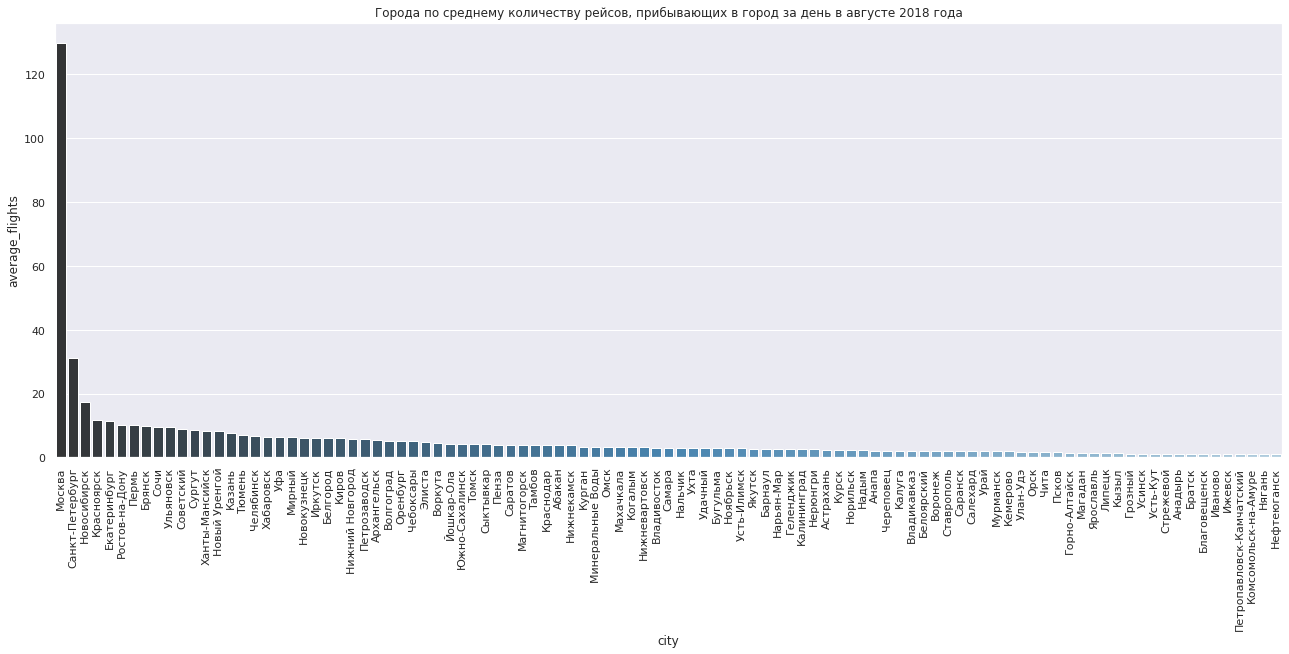

In [19]:
#посмотрим на все города по среднему количеству рейсов, прибывающих в город за день в августе 2018 года
city_and_average_flights_all = city_and_average_flights.sort_values(by='average_flights', ascending=False)

f, ax = plt.subplots(figsize=(22, 8))
ax = sns.barplot(x=city_and_average_flights_all.city, y='average_flights', data=city_and_average_flights_all, palette="Blues_d")
plt.xticks(rotation=90)
plt.title('Города по среднему количеству рейсов, прибывающих в город за день в августе 2018 года')

In [20]:
#найдем топ-10 городов по среднему количеству рейсов, прибывающих в город за день в августе 2018 года
top_10_city_and_average_flights = city_and_average_flights.sort_values(by='average_flights', ascending=False).head(10)
top_10_city_and_average_flights

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


Text(0.5, 1.0, 'Топ-10 городов по среднему количеству рейсов, прибывающих в город за день в августе 2018 года')

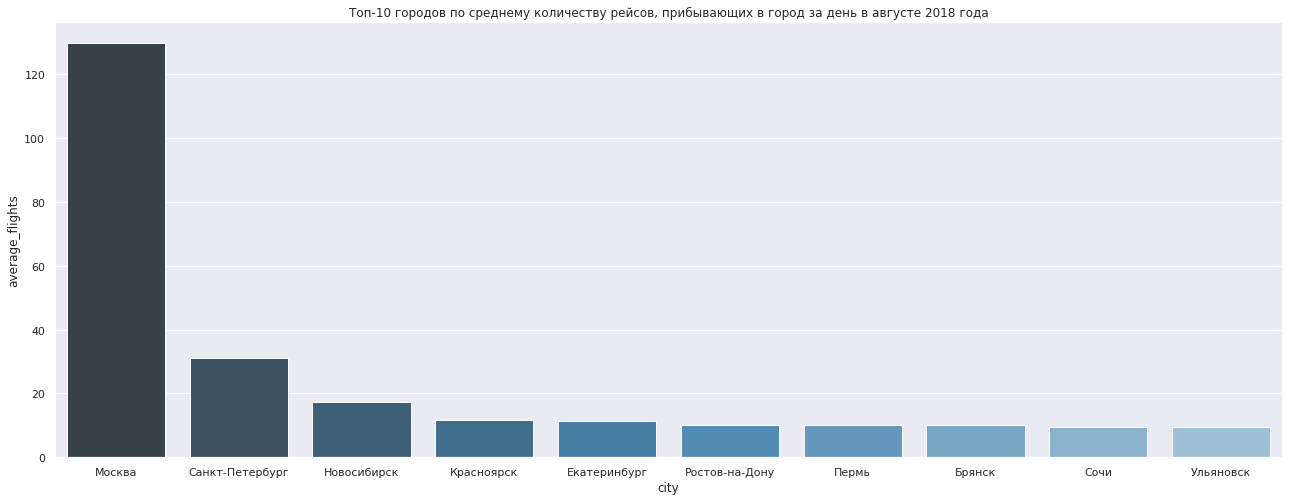

In [21]:
#потроим график
f, ax = plt.subplots(figsize=(22, 8))
ax = sns.barplot(x=top_10_city_and_average_flights.city, y='average_flights', data=top_10_city_and_average_flights, palette="Blues_d")
plt.title('Топ-10 городов по среднему количеству рейсов, прибывающих в город за день в августе 2018 года')

Москва как столица и главный транспортный узел страны - лидирует с большим отрывом по количеству рейсов в день. На втором месте - "культурная столица" Санкт-Петербург, которая так же является важным транспортным узлом. На третьем месте - Новосибирск, являющийся важным транспортным узлом в Сибири. Остальные региональные города почти не отличаются числом рейсов в день.

In [22]:
#найдем топ-10 моделей по количество рейсов для каждой модели самолетов в сентябре 2018 года
top_10_model_and_flights_amount = models_and_flights_amount.sort_values(by='flights_amount', ascending=False).head(10)
top_10_model_and_flights_amount

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


Text(0.5, 1.0, 'Топ-10 моделей по количество рейсов для каждой модели самолетов в сентябре 2018 года')

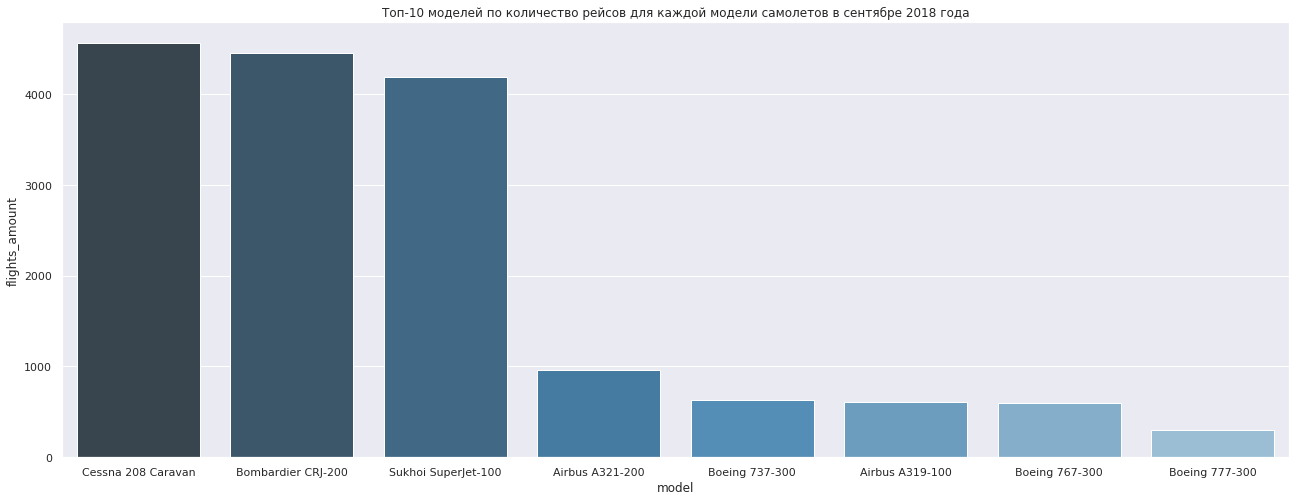

In [23]:
#потроим график
f, ax = plt.subplots(figsize=(22, 8))
ax = sns.barplot(x=top_10_model_and_flights_amount.model, y='flights_amount', data=top_10_model_and_flights_amount, palette="Blues_d")
plt.title('Топ-10 моделей по количество рейсов для каждой модели самолетов в сентябре 2018 года')

Удивительно, но в первой тройке оказалась малогабаритные моделей самолетов, которые используется на авиалиниях малой протяженности в регионах. Количество полетов лидера Cessna 208 Caravan почти в 4 раза больше, чем у популярной модели для дальних перелетов Airbus A321-200.

<div>
    
<img src="https://aviav.ru/wp-content/uploads/2018/03/cessna-208-caravan-i-grand-caravan-cargomaster-09.jpg">
    
    
Вот он красавчик Cessna 208 Caravan - лидер по количеству рейсов для каждой модели самолетов в сентябре 2018 года.
    

</div>

<div>
    


    
<img src="https://upload.wikimedia.org/wikipedia/commons/2/24/Boeing_777-300ER_Air_France_%28AFR%29_F-GZNI_-_MSN_39973_924_%289273105460%29.jpg">
    
    
А это боинг Boeing 777-300. Хоть он редко летает, зато перевозит больше людей на дальние расстояния))) Все имеет свое объяснение ;)
    

</div>


<a id='3'><a/> 
## 3. Выводы
[Назад к оглавлению](#back)

Москва, Санкт-Петербург и Новосибирс являются главными транспортными узлами, принимающими наибольшее число рейсов в день. Не смотря на то, что у большимнства людей полеты ассоциируются с большими красивыми авиолайнерами как Airbus и Boeing, больше всего рйсов совершают небольшие самолеты, а на первом месте по числу рейсов находится крошечный самолет. Можно сделать вывод, что наибольшее число рейсов принимают крупыне города, но в то же время в регионах чаще летают малогабаритные самолеты.